In [1]:
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)
setwd("/mnt/disks/yeatman-scratch/PREK_MEG")
list.files()
dsnr = read.csv("all_subjects-fsaverage-freq_domain-stc_2Hz_snr.csv",row.name=1)
dsubs = read.csv('prek_3year_atleast2.csv')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] "all_subjects-fsaverage-freq_domain-stc_2Hz.csv"    
 [2] "all_subjects-fsaverage-freq_domain-stc_2Hz_snr.csv"
 [3] "all_subjects-fsaverage-freq_domain-stc.csv"        
 [4] "prek_1103_2Hz.csv"                                 
 [5] "prek_1110_2Hz.csv"                                 
 [6] "prek_1112_2Hz.csv"                                 
 [7] "prek_1113_2Hz.csv"                                 
 [8] "prek_1184_2Hz.csv"                                 
 [9] "prek_1208_2Hz.csv"                                 
[10] "prek_1210_2Hz.csv"                                 
[11] "prek_1241_2Hz.csv"                                 
[12] "prek_1262_2Hz.csv"                                 
[13] "prek_1271_2Hz.csv"                                 
[14] "prek_1293_2Hz.csv"                                 
[15] "prek_1302_2Hz.csv"                                 
[16] "prek_1372_2Hz.csv"                                 
[17] "prek_1382_2Hz.csv"                                 
[18] "prek_1391_2Hz.csv"                                 
[19] "prek_1401_2Hz.csv"                                 
[20] "prek_1443_2Hz.csv"                                 
[21] "prek_1460_2Hz.csv"                                 
[22] "prek_1490_2Hz.csv"                                 
[23] "prek_1505_2Hz.csv"                                 
[24] "prek_1673_2Hz.csv"                                 
[25] "prek_1676_2Hz.csv"                                 
[26] "prek_1691_2Hz.csv"                                 
[27] "prek_1706_2Hz.csv"                                 
[28] "prek_1714_2Hz.csv"                                 
[29] "prek_1715_2Hz.csv"                                 
[30] "prek_1750_2Hz.csv"                                 
[31] "prek_1751_2Hz.csv"                                 
[32] "prek_1756_2Hz.csv"                                 
[33] "prek_1762_2Hz.csv"                                 
[34] "prek_1768_2Hz.csv"                                 
[35] "prek_1790_2Hz.csv"                                 
[36] "prek_1798_2Hz.csv"                                 
[37] "prek_1812_2Hz.csv"                                 
[38] "prek_1818_2Hz.csv"                                 
[39] "prek_1868_2Hz.csv"                                 
[40] "prek_1869_2Hz.csv"                                 
[41] "prek_1878_2Hz.csv"                                 
[42] "prek_1887_2Hz.csv"                                 
[43] "prek_1901_2Hz.csv"                                 
[44] "prek_1916_2Hz.csv"                                 
[45] "prek_1921_2Hz.csv"                                 
[46] "prek_1936_2Hz.csv"                                 
[47] "prek_1939_2Hz.csv"                                 
[48] "prek_1940_2Hz.csv"                                 
[49] "prek_1951_2Hz.csv"                                 
[50] "prek_1964_2Hz.csv"                                 
[51] "prek_1966_2Hz.csv"                                 
[52] "prek_3year_atleast2.csv"                           
[53] "yeatman_NLR_tree.txt"

,freq,mp
1,1.6,43.00961
2,1.8,37.90089
3,2,44.96295
4,2.2,32.89751
5,2.4,32.04924


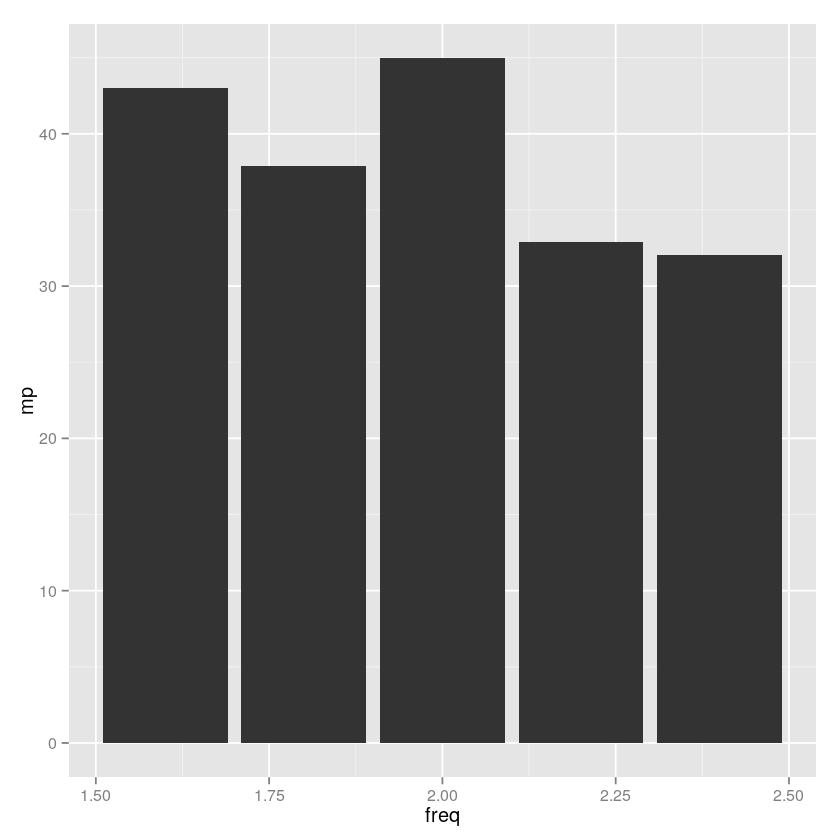

In [6]:
#hz = read.csv('all_subjects-fsaverage-freq_domain-stc_2Hz.csv')
md = summarize(group_by(hz,freq), mp=mean(value))
head(md)
ggplot(data=md, aes(x = freq, y = mp)) + geom_bar(stat = 'identity')

In [70]:
dsnr2$hemi <- str_sub(dsnr2$source,1,2)
dsnr$hemi <- str_sub(dsnr$source,1,2)


In [81]:
#head(dsnr2)
#head(dsubs)
dsubs$timepoint=dsubs$visit
df <- full_join(dsubs,summarize(group_by(dsnr2,subID,timepoint,hemi),msnr=mean(snr),medsnr=median(snr)))
head(df)

Joining by: c("subID", "timepoint")
Warning message:
In outer_join_impl(x, y, by$x, by$y): joining factors with different levels, coercing to character vector

,subID,event,group,AlphabetKnowledge_Upper,AlphabetKnowledge_Lower,Decoding,PhonemeMatching,PhonemeSegmenting,EVTRaw,Retell,Grammar,PDE,SWE,WJ_BRS,Age,AlphabetKnowledge,visit,timepoint,hemi,msnr,medsnr
1,1103,Visit 2,Language,23,26,0,7,1,86,16,12,NaN,NaN,NaN,66.37712,49,pre,pre,LH,4.24673,3.920309
2,1103,Visit 2,Language,23,26,0,7,1,86,16,12,NaN,NaN,NaN,66.37712,49,pre,pre,RH,5.595671,5.323158
3,1103,Visit 3,Language,40,19,0,8,0,91,15,12,NaN,NaN,NaN,67.06704,59,post,post,LH,4.305253,4.111007
4,1103,Visit 3,Language,40,19,0,8,0,91,15,12,NaN,NaN,NaN,67.06704,59,post,post,RH,5.201692,5.008931
5,1110,Visit 2,Language,46,44,4,12,2,94,21,14,NaN,NaN,NaN,61.77795,90,pre,pre,LH,4.909697,4.675826
6,1110,Visit 2,Language,46,44,4,12,2,94,21,14,NaN,NaN,NaN,61.77795,90,pre,pre,RH,3.950251,3.764767


In [83]:
library(ggplot2)
library(lme4)
lm1 = lm(AlphabetKnowledge ~ medsnr,filter(df,timepoint=='pre',hemi=='LH'))
summary(lm1)
lm2 = lmer(msnr ~ group * timepoint + (1 | subID),filter(df,hemi=='LH'))
summary(lm2)



Call:
lm(formula = AlphabetKnowledge ~ medsnr, data = filter(df, timepoint == 
    "pre", hemi == "LH"))

Residuals:
    Min      1Q  Median      3Q     Max 
-49.604 -17.171   2.614  19.863  36.726 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   30.105     16.477   1.827   0.0742 .
medsnr         7.189      3.551   2.025   0.0487 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.79 on 46 degrees of freedom
Multiple R-squared:  0.08181,	Adjusted R-squared:  0.06185 
F-statistic: 4.099 on 1 and 46 DF,  p-value: 0.04874


Linear mixed model fit by REML ['lmerMod']
Formula: msnr ~ group * timepoint + (1 | subID)
   Data: filter(df, hemi == "LH")

REML criterion at convergence: 202.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.79327 -0.41587 -0.09664  0.41102  2.53815 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 1.0085   1.004   
 Residual             0.1011   0.318   
Number of obs: 96, groups:  subID, 48

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               4.59959    0.21502  21.392
groupLetter               0.33848    0.30408   1.113
timepointpre              0.07187    0.09179   0.783
groupLetter:timepointpre -0.07187    0.12982  -0.554

Correlation of Fixed Effects:
            (Intr) grpLtt tmpntp
groupLetter -0.707              
timepointpr -0.213  0.151       
grpLttr:tmp  0.151 -0.213 -0.707

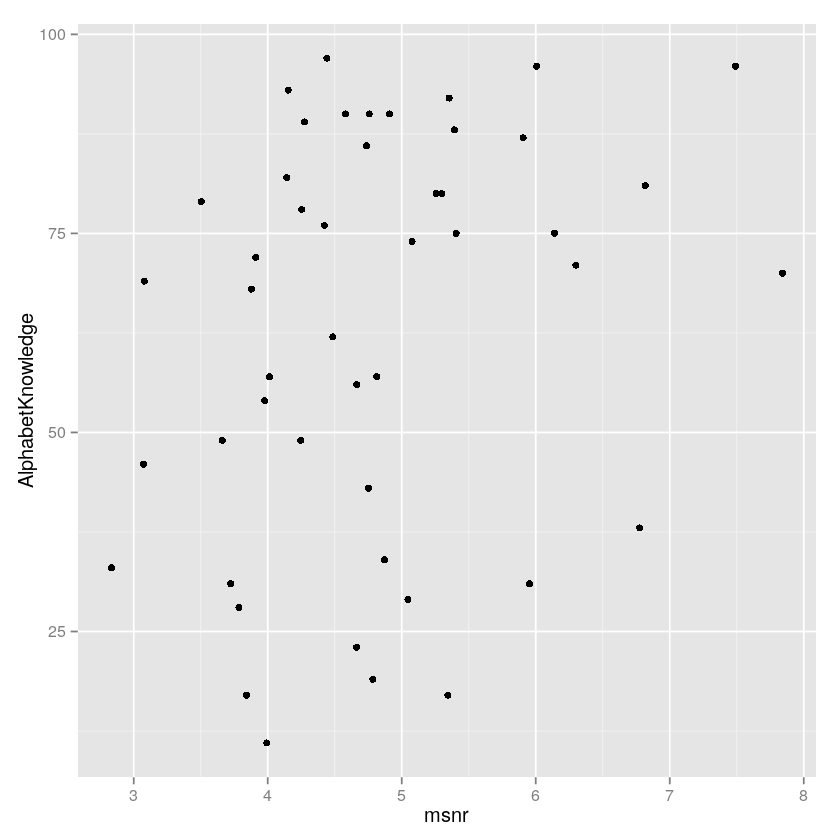

In [76]:
ggplot(filter(df,timepoint=='pre',hemi=='LH'),aes(x=msnr,y=AlphabetKnowledge)) + geom_point()


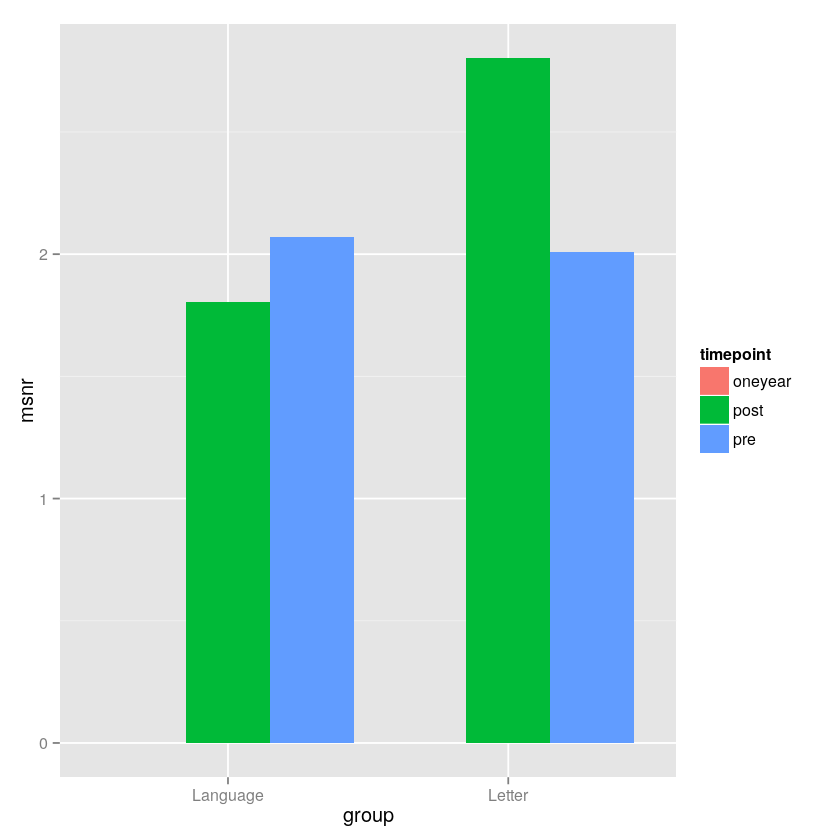

In [65]:
ggplot(df, aes(x = group, y = msnr, fill = timepoint), na.rm=TRUE,stat=mean)+geom_bar(stat='identity',position='dodge')